In [1]:
def get_morphemes(f_name='neko.txt.mecab'):
    morphemes = []
    
    with open(f_name) as f:
        for line in f.readlines():
            line = line.replace('\n', '')

            cols = line.split('\t')
            if len(cols) < 2:
                continue

            surface = cols[0]
            cols = cols[1]
            cols = cols.split(',')

            morpheme = {
                'surface': surface,
                'base': cols[6],
                'pos': cols[0],
                'pos1': cols[1] 
            }
            morphemes.append(morpheme)
            
    return morphemes

In [2]:
import collections

morphemes = get_morphemes()
base_list = [morpheme['base'] for morpheme in morphemes]
c = collections.Counter(base_list)
top10 = []
for i, (k, v) in enumerate(c.most_common()):
    if i >=10:
        break
    top10.append([k, v])

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns; sns.set(font="IPAexGothic")
%config InlineBackend.figure_format = 'retina'

<BarContainer object of 10 artists>

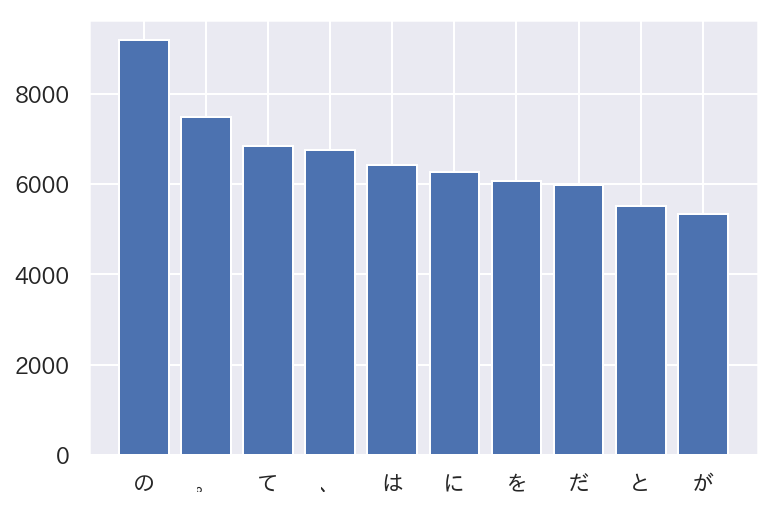

In [5]:
x = np.arange(len(top10)) 
y = np.array([v for k, v in top10])
label = np.array([k for k, v in top10])
plt.xticks(x, label)
plt.bar(x, y)